In [96]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Data descriptions

- **classes:** edible=e, poisonous=p 

- **cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- **cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

- **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- **bruises:** bruises=t,no=f

- **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- **gill-attachment:** attached=a,descending=d,free=f,notched=n

- **gill-spacing:** close=c,crowded=w,distant=d

- **gill-size:** broad=b,narrow=n

- **gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- **stalk-shape:** enlarging=e,tapering=t

- **stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **veil-type:** partial=p,universal=u

- **veil-color:** brown=n,orange=o,white=w,yellow=y

- **ring-number:** none=n,one=o,two=t

- **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- **population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- **habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [99]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [100]:
df.shape

(8124, 23)

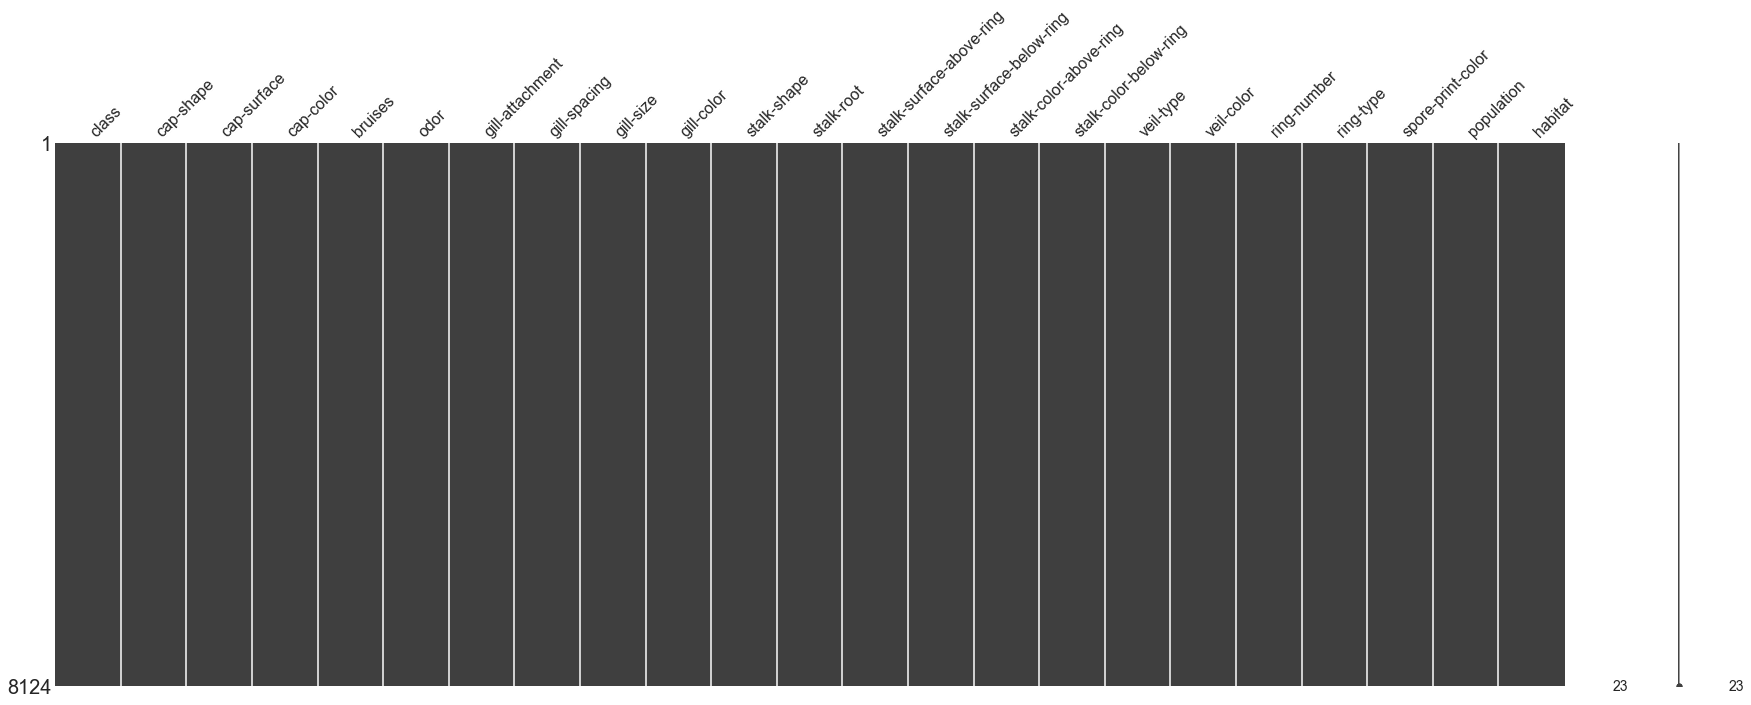

In [101]:
missingno.matrix(df, figsize=(30,10))

In [102]:
df_train = df.head(6500)
df_test = df.tail(1624)

In [103]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()
df_bin['class'] = np.where(df_train['class'] == 'p', 1, 0) # 1 poisonous, 0 edible
df_con['class'] = df_train['class']

# Feature: class
Description: Whether the mushroom is poisonous or not.

Key: edible=(0,e), poisonous=(1,p)

This is the variable we want to **predict**. 

e    3701
p    2799
Name: class, dtype: int64


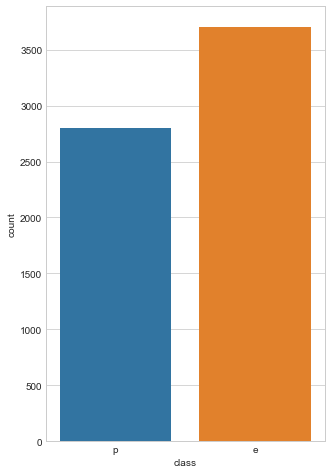

In [104]:
fig = plt.figure(figsize=(5,8))
sns.countplot(x='class', data=df_train)
print(df_train['class'].value_counts())

In [131]:
def make_plot(feature):
    fig = plt.figure(figsize=(8,8))
    color = ['#DA70D6', '#ADFF2F']
    sns.countplot(x= feature, hue='class', data=df_train, palette=sns.color_palette(color))

# Feature: cap-shape
Description: Shape of the mushroom cap.

Key: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

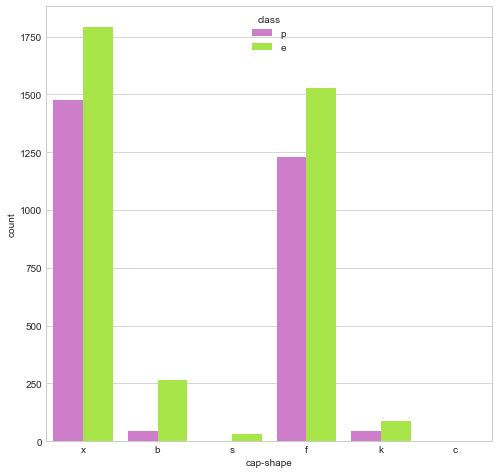

In [132]:
# fig = plt.figure(figsize=(8,8))

# color = ['#DA70D6', '#ADFF2F']
# sns.countplot(x='cap-shape', hue='class', data=df_train, palette=sns.color_palette(color))
make_plot('cap-shape')

# Feature: cap-surface
Description: Surface of the cap.

Key: fibrous=f, grooves=g, scaly=y, smooth=s

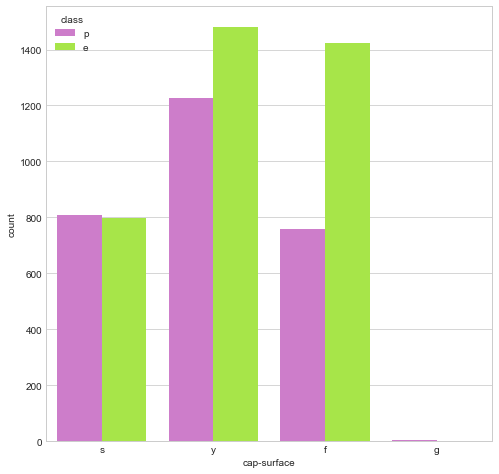

In [107]:
# fig = plt.figure(figsize=(5,8))

# color = ['#DA70D6', '#ADFF2F']
# sns.countplot(x='cap-surface', hue='class', data=df_train, palette=sns.color_palette(color))
make_plot('cap-surface')

# Feature: cap-color
Key: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

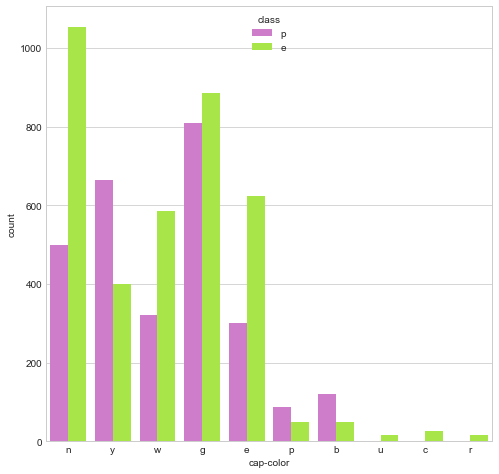

In [111]:
make_plot('cap-color')

# Feature: bruises
Key: bruises=t, no=f

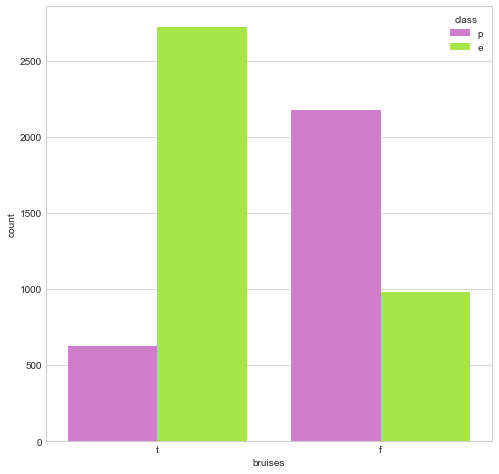

In [116]:
make_plot('bruises')

# Feature: odor
Key: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, one=n, pungent=p, spicy=s



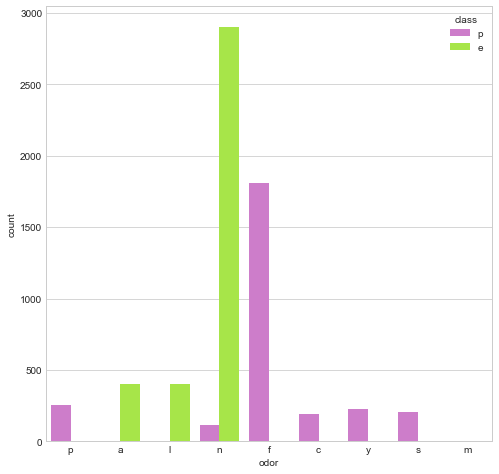

In [133]:
make_plot('odor')

# Feature: gill-attachment
Key: attached=a, descending=d, free=f, notched=n

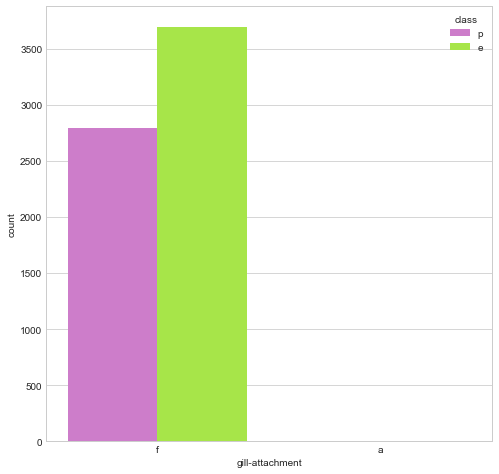

In [134]:
make_plot('gill-attachment')

# Feature encoding

In [137]:
df_train_enc = df_train.apply(LabelEncoder().fit_transform)
df_train_enc.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,1,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,2,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,2,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,1,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1


# Building ML model

In [138]:
selected_df = df_train_enc


In [139]:
# split dataframe into data and labels
x_train = selected_df.drop('class', axis=1)
y_train = selected_df['class']

# Define funtion to fit ML algo

In [147]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    # One Pass
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# Logistic regression

In [148]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 95.02
Accuracy CV 10-Fold: 87.43
Running Time: 0:00:03.326107


# K-Nearest Neighbours

In [150]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 99.85
Accuracy CV 10-Fold: 91.85
Running Time: 0:00:00.951430


# Gaussian Naive Bayes

In [151]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 57.0
Accuracy CV 10-Fold: 52.82
Running Time: 0:00:00.078820


# Linear Support Vector Machines (SVC)

In [152]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))


Accuracy: 94.85
Accuracy CV 10-Fold: 88.75
Running Time: 0:00:03.312623


# Stochastic Gradient Descent

In [154]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 96.98
Accuracy CV 10-Fold: 86.11
Running Time: 0:00:00.403923


# Decision Tree Classifier

In [156]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 93.03
Running Time: 0:00:00.112700


# Gradient Boost Trees

In [157]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))


Accuracy: 100.0
Accuracy CV 10-Fold: 95.05
Running Time: 0:00:02.967127


# Catboost Algo

In [158]:
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [159]:
train_pool = Pool(x_train, y_train, cat_features)

In [160]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.022911
0:	learn: 0.6358214	total: 100ms	remaining: 1m 40s
1:	learn: 0.5922367	total: 110ms	remaining: 54.7s
2:	learn: 0.5369683	total: 148ms	remaining: 49.2s
3:	learn: 0.4940110	total: 173ms	remaining: 43.2s
4:	learn: 0.4561171	total: 194ms	remaining: 38.6s
5:	learn: 0.4104970	total: 221ms	remaining: 36.6s
6:	learn: 0.3803021	total: 229ms	remaining: 32.4s
7:	learn: 0.3434815	total: 253ms	remaining: 31.4s
8:	learn: 0.3223071	total: 260ms	remaining: 28.6s
9:	learn: 0.2928239	total: 284ms	remaining: 28.1s
10:	learn: 0.2758105	total: 292ms	remaining: 26.2s
11:	learn: 0.2602779	total: 297ms	remaining: 24.4s
12:	learn: 0.2436452	total: 321ms	remaining: 24.4s
13:	learn: 0.2179451	total: 353ms	remaining: 24.9s
14:	learn: 0.1937220	total: 384ms	remaining: 25.2s
15:	learn: 0.1719269	total: 403ms	remaining: 24.8s
16:	learn: 0.1533010	total: 423ms	remaining: 24.5s
17:	learn: 0.1370237	total: 450ms	remaining: 24.6s
18:	learn: 0.1247318	total: 484ms	remaining: 25s
19:	learn: 0

162:	learn: 0.0023482	total: 7.16s	remaining: 36.8s
163:	learn: 0.0023053	total: 7.22s	remaining: 36.8s
164:	learn: 0.0023003	total: 7.26s	remaining: 36.7s
165:	learn: 0.0022947	total: 7.31s	remaining: 36.7s
166:	learn: 0.0022829	total: 7.36s	remaining: 36.7s
167:	learn: 0.0022574	total: 7.41s	remaining: 36.7s
168:	learn: 0.0022552	total: 7.45s	remaining: 36.6s
169:	learn: 0.0022536	total: 7.49s	remaining: 36.5s
170:	learn: 0.0022490	total: 7.6s	remaining: 36.9s
171:	learn: 0.0022421	total: 7.66s	remaining: 36.9s
172:	learn: 0.0022366	total: 7.7s	remaining: 36.8s
173:	learn: 0.0022366	total: 7.73s	remaining: 36.7s
174:	learn: 0.0022345	total: 7.8s	remaining: 36.8s
175:	learn: 0.0022345	total: 7.83s	remaining: 36.7s
176:	learn: 0.0022302	total: 7.88s	remaining: 36.6s
177:	learn: 0.0022278	total: 7.92s	remaining: 36.6s
178:	learn: 0.0022263	total: 7.98s	remaining: 36.6s
179:	learn: 0.0022211	total: 8.02s	remaining: 36.5s
180:	learn: 0.0022211	total: 8.06s	remaining: 36.5s
181:	learn: 0.0

325:	learn: 0.0014294	total: 14.3s	remaining: 29.6s
326:	learn: 0.0014294	total: 14.4s	remaining: 29.6s
327:	learn: 0.0014225	total: 14.4s	remaining: 29.5s
328:	learn: 0.0014036	total: 14.4s	remaining: 29.5s
329:	learn: 0.0014036	total: 14.5s	remaining: 29.4s
330:	learn: 0.0014036	total: 14.5s	remaining: 29.4s
331:	learn: 0.0014008	total: 14.6s	remaining: 29.3s
332:	learn: 0.0013886	total: 14.6s	remaining: 29.2s
333:	learn: 0.0013886	total: 14.6s	remaining: 29.2s
334:	learn: 0.0013885	total: 14.7s	remaining: 29.1s
335:	learn: 0.0013885	total: 14.7s	remaining: 29s
336:	learn: 0.0013885	total: 14.7s	remaining: 29s
337:	learn: 0.0013885	total: 14.8s	remaining: 28.9s
338:	learn: 0.0013885	total: 14.8s	remaining: 28.9s
339:	learn: 0.0013885	total: 14.9s	remaining: 29s
340:	learn: 0.0013885	total: 15s	remaining: 29s
341:	learn: 0.0013860	total: 15.1s	remaining: 29s
342:	learn: 0.0013860	total: 15.1s	remaining: 28.9s
343:	learn: 0.0013860	total: 15.1s	remaining: 28.8s
344:	learn: 0.0013860	to

485:	learn: 0.0009708	total: 21.6s	remaining: 22.9s
486:	learn: 0.0009708	total: 21.7s	remaining: 22.8s
487:	learn: 0.0009708	total: 21.7s	remaining: 22.8s
488:	learn: 0.0009708	total: 21.8s	remaining: 22.7s
489:	learn: 0.0009708	total: 21.8s	remaining: 22.7s
490:	learn: 0.0009708	total: 21.8s	remaining: 22.6s
491:	learn: 0.0009677	total: 21.9s	remaining: 22.6s
492:	learn: 0.0009676	total: 21.9s	remaining: 22.5s
493:	learn: 0.0009676	total: 22s	remaining: 22.5s
494:	learn: 0.0009630	total: 22s	remaining: 22.5s
495:	learn: 0.0009586	total: 22.1s	remaining: 22.4s
496:	learn: 0.0009586	total: 22.1s	remaining: 22.4s
497:	learn: 0.0009568	total: 22.2s	remaining: 22.3s
498:	learn: 0.0009568	total: 22.2s	remaining: 22.3s
499:	learn: 0.0009536	total: 22.3s	remaining: 22.3s
500:	learn: 0.0009493	total: 22.3s	remaining: 22.2s
501:	learn: 0.0009493	total: 22.4s	remaining: 22.2s
502:	learn: 0.0009476	total: 22.4s	remaining: 22.1s
503:	learn: 0.0009476	total: 22.4s	remaining: 22.1s
504:	learn: 0.00

644:	learn: 0.0009219	total: 29s	remaining: 15.9s
645:	learn: 0.0009219	total: 29s	remaining: 15.9s
646:	learn: 0.0009219	total: 29s	remaining: 15.8s
647:	learn: 0.0009219	total: 29.1s	remaining: 15.8s
648:	learn: 0.0009219	total: 29.1s	remaining: 15.7s
649:	learn: 0.0009219	total: 29.2s	remaining: 15.7s
650:	learn: 0.0009219	total: 29.2s	remaining: 15.7s
651:	learn: 0.0009219	total: 29.2s	remaining: 15.6s
652:	learn: 0.0009219	total: 29.3s	remaining: 15.6s
653:	learn: 0.0009219	total: 29.3s	remaining: 15.5s
654:	learn: 0.0009219	total: 29.4s	remaining: 15.5s
655:	learn: 0.0009219	total: 29.4s	remaining: 15.4s
656:	learn: 0.0009219	total: 29.5s	remaining: 15.4s
657:	learn: 0.0009219	total: 29.5s	remaining: 15.4s
658:	learn: 0.0009219	total: 29.6s	remaining: 15.3s
659:	learn: 0.0009219	total: 29.6s	remaining: 15.3s
660:	learn: 0.0009219	total: 29.7s	remaining: 15.2s
661:	learn: 0.0009219	total: 29.7s	remaining: 15.2s
662:	learn: 0.0009219	total: 29.8s	remaining: 15.1s
663:	learn: 0.0009

803:	learn: 0.0009218	total: 36.3s	remaining: 8.86s
804:	learn: 0.0009218	total: 36.4s	remaining: 8.82s
805:	learn: 0.0009218	total: 36.5s	remaining: 8.77s
806:	learn: 0.0009218	total: 36.5s	remaining: 8.73s
807:	learn: 0.0009218	total: 36.6s	remaining: 8.69s
808:	learn: 0.0009218	total: 36.6s	remaining: 8.65s
809:	learn: 0.0009218	total: 36.7s	remaining: 8.6s
810:	learn: 0.0009218	total: 36.8s	remaining: 8.58s
811:	learn: 0.0009218	total: 36.9s	remaining: 8.54s
812:	learn: 0.0009218	total: 36.9s	remaining: 8.49s
813:	learn: 0.0009218	total: 37s	remaining: 8.45s
814:	learn: 0.0009218	total: 37s	remaining: 8.4s
815:	learn: 0.0009218	total: 37.1s	remaining: 8.36s
816:	learn: 0.0009218	total: 37.1s	remaining: 8.31s
817:	learn: 0.0009218	total: 37.1s	remaining: 8.26s
818:	learn: 0.0009218	total: 37.2s	remaining: 8.22s
819:	learn: 0.0009218	total: 37.3s	remaining: 8.18s
820:	learn: 0.0009218	total: 37.3s	remaining: 8.13s
821:	learn: 0.0009218	total: 37.3s	remaining: 8.08s
822:	learn: 0.0009

964:	learn: 0.0009217	total: 44.6s	remaining: 1.61s
965:	learn: 0.0009217	total: 44.6s	remaining: 1.57s
966:	learn: 0.0009217	total: 44.6s	remaining: 1.52s
967:	learn: 0.0009217	total: 44.7s	remaining: 1.48s
968:	learn: 0.0009217	total: 44.8s	remaining: 1.43s
969:	learn: 0.0009217	total: 44.8s	remaining: 1.39s
970:	learn: 0.0009217	total: 44.8s	remaining: 1.34s
971:	learn: 0.0009217	total: 44.9s	remaining: 1.29s
972:	learn: 0.0009217	total: 44.9s	remaining: 1.25s
973:	learn: 0.0009217	total: 45s	remaining: 1.2s
974:	learn: 0.0009217	total: 45s	remaining: 1.15s
975:	learn: 0.0009217	total: 45.1s	remaining: 1.11s
976:	learn: 0.0009217	total: 45.1s	remaining: 1.06s
977:	learn: 0.0009217	total: 45.1s	remaining: 1.01s
978:	learn: 0.0009217	total: 45.2s	remaining: 969ms
979:	learn: 0.0009217	total: 45.2s	remaining: 923ms
980:	learn: 0.0009217	total: 45.3s	remaining: 877ms
981:	learn: 0.0009217	total: 45.3s	remaining: 831ms
982:	learn: 0.0009217	total: 45.4s	remaining: 785ms
983:	learn: 0.000

# Catboost cross-validation

In [161]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6180288	test: 0.6180051	best: 0.6180051 (0)	total: 471ms	remaining: 7m 50s
1:	learn: 0.5589285	test: 0.5588442	best: 0.5588442 (1)	total: 914ms	remaining: 7m 36s
2:	learn: 0.5060552	test: 0.5058290	best: 0.5058290 (2)	total: 1.61s	remaining: 8m 57s
3:	learn: 0.4562674	test: 0.4559985	best: 0.4559985 (3)	total: 2.13s	remaining: 8m 51s
4:	learn: 0.4103614	test: 0.4100025	best: 0.4100025 (4)	total: 2.57s	remaining: 8m 30s
5:	learn: 0.3695013	test: 0.3688911	best: 0.3688911 (5)	total: 2.95s	remaining: 8m 8s
6:	learn: 0.3301168	test: 0.3293132	best: 0.3293132 (6)	total: 3.36s	remaining: 7m 56s
7:	learn: 0.2934501	test: 0.2927370	best: 0.2927370 (7)	total: 4.1s	remaining: 8m 28s
8:	learn: 0.2616079	test: 0.2608367	best: 0.2608367 (8)	total: 5.23s	remaining: 9m 36s
9:	learn: 0.2372949	test: 0.2365266	best: 0.2365266 (9)	total: 5.57s	remaining: 9m 11s
10:	learn: 0.2107201	test: 0.2098048	best: 0.2098048 (10)	total: 6.01s	remaining: 9m
11:	learn: 0.1838338	test: 0.1828813	best: 0.18

93:	learn: 0.0038419	test: 0.0033475	best: 0.0033475 (93)	total: 53.1s	remaining: 8m 31s
94:	learn: 0.0037732	test: 0.0032796	best: 0.0032796 (94)	total: 53.7s	remaining: 8m 31s
95:	learn: 0.0037375	test: 0.0032522	best: 0.0032522 (95)	total: 54.3s	remaining: 8m 30s
96:	learn: 0.0037021	test: 0.0032216	best: 0.0032216 (96)	total: 54.9s	remaining: 8m 30s
97:	learn: 0.0036846	test: 0.0032099	best: 0.0032099 (97)	total: 55.5s	remaining: 8m 30s
98:	learn: 0.0036452	test: 0.0031699	best: 0.0031699 (98)	total: 56.1s	remaining: 8m 30s
99:	learn: 0.0036213	test: 0.0031470	best: 0.0031470 (99)	total: 56.7s	remaining: 8m 29s
100:	learn: 0.0035984	test: 0.0031282	best: 0.0031282 (100)	total: 57.2s	remaining: 8m 28s
101:	learn: 0.0035527	test: 0.0030870	best: 0.0030870 (101)	total: 57.8s	remaining: 8m 28s
102:	learn: 0.0035271	test: 0.0030665	best: 0.0030665 (102)	total: 58.4s	remaining: 8m 28s
103:	learn: 0.0035051	test: 0.0030479	best: 0.0030479 (103)	total: 59s	remaining: 8m 28s
104:	learn: 0.0

183:	learn: 0.0019656	test: 0.0016957	best: 0.0016957 (183)	total: 1m 42s	remaining: 7m 36s
184:	learn: 0.0019617	test: 0.0016921	best: 0.0016921 (184)	total: 1m 43s	remaining: 7m 37s
185:	learn: 0.0019525	test: 0.0016840	best: 0.0016840 (185)	total: 1m 44s	remaining: 7m 36s
186:	learn: 0.0019505	test: 0.0016828	best: 0.0016828 (186)	total: 1m 44s	remaining: 7m 35s
187:	learn: 0.0019454	test: 0.0016786	best: 0.0016786 (187)	total: 1m 45s	remaining: 7m 34s
188:	learn: 0.0019324	test: 0.0016702	best: 0.0016702 (188)	total: 1m 45s	remaining: 7m 33s
189:	learn: 0.0019287	test: 0.0016638	best: 0.0016638 (189)	total: 1m 46s	remaining: 7m 32s
190:	learn: 0.0019222	test: 0.0016581	best: 0.0016581 (190)	total: 1m 46s	remaining: 7m 31s
191:	learn: 0.0019190	test: 0.0016563	best: 0.0016563 (191)	total: 1m 47s	remaining: 7m 30s
192:	learn: 0.0019148	test: 0.0016525	best: 0.0016525 (192)	total: 1m 47s	remaining: 7m 29s
193:	learn: 0.0019045	test: 0.0016455	best: 0.0016455 (193)	total: 1m 48s	remain

273:	learn: 0.0015058	test: 0.0013085	best: 0.0013085 (273)	total: 2m 30s	remaining: 6m 38s
274:	learn: 0.0014992	test: 0.0013013	best: 0.0013013 (274)	total: 2m 30s	remaining: 6m 37s
275:	learn: 0.0014963	test: 0.0012980	best: 0.0012980 (275)	total: 2m 31s	remaining: 6m 36s
276:	learn: 0.0014942	test: 0.0012971	best: 0.0012971 (276)	total: 2m 31s	remaining: 6m 36s
277:	learn: 0.0014866	test: 0.0012897	best: 0.0012897 (277)	total: 2m 32s	remaining: 6m 36s
278:	learn: 0.0014855	test: 0.0012891	best: 0.0012891 (278)	total: 2m 33s	remaining: 6m 35s
279:	learn: 0.0014805	test: 0.0012858	best: 0.0012858 (279)	total: 2m 33s	remaining: 6m 34s
280:	learn: 0.0014785	test: 0.0012845	best: 0.0012845 (280)	total: 2m 34s	remaining: 6m 34s
281:	learn: 0.0014732	test: 0.0012805	best: 0.0012805 (281)	total: 2m 34s	remaining: 6m 33s
282:	learn: 0.0014705	test: 0.0012783	best: 0.0012783 (282)	total: 2m 35s	remaining: 6m 33s
283:	learn: 0.0014705	test: 0.0012783	best: 0.0012783 (283)	total: 2m 35s	remain

363:	learn: 0.0013426	test: 0.0011772	best: 0.0011772 (363)	total: 3m 18s	remaining: 5m 46s
364:	learn: 0.0013417	test: 0.0011769	best: 0.0011769 (364)	total: 3m 18s	remaining: 5m 45s
365:	learn: 0.0013392	test: 0.0011750	best: 0.0011750 (365)	total: 3m 19s	remaining: 5m 45s
366:	learn: 0.0013391	test: 0.0011750	best: 0.0011750 (366)	total: 3m 19s	remaining: 5m 44s
367:	learn: 0.0013386	test: 0.0011747	best: 0.0011747 (367)	total: 3m 20s	remaining: 5m 44s
368:	learn: 0.0013385	test: 0.0011746	best: 0.0011746 (368)	total: 3m 21s	remaining: 5m 43s
369:	learn: 0.0013377	test: 0.0011740	best: 0.0011740 (369)	total: 3m 21s	remaining: 5m 43s
370:	learn: 0.0013367	test: 0.0011733	best: 0.0011733 (370)	total: 3m 22s	remaining: 5m 42s
371:	learn: 0.0013361	test: 0.0011727	best: 0.0011727 (371)	total: 3m 22s	remaining: 5m 42s
372:	learn: 0.0013355	test: 0.0011722	best: 0.0011722 (372)	total: 3m 23s	remaining: 5m 41s
373:	learn: 0.0013351	test: 0.0011718	best: 0.0011718 (373)	total: 3m 24s	remain

453:	learn: 0.0012836	test: 0.0011362	best: 0.0011362 (453)	total: 4m 7s	remaining: 4m 57s
454:	learn: 0.0012836	test: 0.0011362	best: 0.0011362 (454)	total: 4m 7s	remaining: 4m 56s
455:	learn: 0.0012835	test: 0.0011361	best: 0.0011361 (455)	total: 4m 8s	remaining: 4m 56s
456:	learn: 0.0012834	test: 0.0011361	best: 0.0011361 (456)	total: 4m 9s	remaining: 4m 56s
457:	learn: 0.0012834	test: 0.0011361	best: 0.0011361 (457)	total: 4m 9s	remaining: 4m 55s
458:	learn: 0.0012833	test: 0.0011361	best: 0.0011361 (458)	total: 4m 10s	remaining: 4m 54s
459:	learn: 0.0012833	test: 0.0011361	best: 0.0011361 (459)	total: 4m 10s	remaining: 4m 54s
460:	learn: 0.0012833	test: 0.0011361	best: 0.0011361 (460)	total: 4m 11s	remaining: 4m 53s
461:	learn: 0.0012832	test: 0.0011361	best: 0.0011361 (461)	total: 4m 11s	remaining: 4m 53s
462:	learn: 0.0012832	test: 0.0011361	best: 0.0011361 (462)	total: 4m 12s	remaining: 4m 52s
463:	learn: 0.0012831	test: 0.0011360	best: 0.0011360 (463)	total: 4m 12s	remaining: 

543:	learn: 0.0012780	test: 0.0011346	best: 0.0011346 (542)	total: 4m 59s	remaining: 4m 10s
544:	learn: 0.0012780	test: 0.0011346	best: 0.0011346 (544)	total: 5m	remaining: 4m 10s
545:	learn: 0.0012779	test: 0.0011346	best: 0.0011346 (544)	total: 5m	remaining: 4m 10s
546:	learn: 0.0012778	test: 0.0011346	best: 0.0011346 (546)	total: 5m 1s	remaining: 4m 9s
547:	learn: 0.0012777	test: 0.0011346	best: 0.0011346 (547)	total: 5m 1s	remaining: 4m 9s
548:	learn: 0.0012777	test: 0.0011346	best: 0.0011346 (548)	total: 5m 2s	remaining: 4m 8s
549:	learn: 0.0012777	test: 0.0011346	best: 0.0011346 (549)	total: 5m 3s	remaining: 4m 8s
550:	learn: 0.0012776	test: 0.0011345	best: 0.0011345 (550)	total: 5m 3s	remaining: 4m 7s
551:	learn: 0.0012776	test: 0.0011345	best: 0.0011345 (550)	total: 5m 4s	remaining: 4m 6s
552:	learn: 0.0012775	test: 0.0011345	best: 0.0011345 (552)	total: 5m 5s	remaining: 4m 6s
553:	learn: 0.0012774	test: 0.0011345	best: 0.0011345 (553)	total: 5m 5s	remaining: 4m 6s
554:	learn: 

633:	learn: 0.0012738	test: 0.0011334	best: 0.0011334 (633)	total: 5m 52s	remaining: 3m 23s
634:	learn: 0.0012738	test: 0.0011334	best: 0.0011334 (634)	total: 5m 53s	remaining: 3m 23s
635:	learn: 0.0012738	test: 0.0011334	best: 0.0011334 (635)	total: 5m 53s	remaining: 3m 22s
636:	learn: 0.0012737	test: 0.0011333	best: 0.0011333 (636)	total: 5m 54s	remaining: 3m 21s
637:	learn: 0.0012737	test: 0.0011333	best: 0.0011333 (637)	total: 5m 54s	remaining: 3m 21s
638:	learn: 0.0012737	test: 0.0011333	best: 0.0011333 (638)	total: 5m 55s	remaining: 3m 20s
639:	learn: 0.0012737	test: 0.0011333	best: 0.0011333 (639)	total: 5m 55s	remaining: 3m 20s
640:	learn: 0.0012736	test: 0.0011333	best: 0.0011333 (639)	total: 5m 56s	remaining: 3m 19s
641:	learn: 0.0012736	test: 0.0011333	best: 0.0011333 (641)	total: 5m 57s	remaining: 3m 19s
642:	learn: 0.0012736	test: 0.0011333	best: 0.0011333 (642)	total: 5m 57s	remaining: 3m 18s
643:	learn: 0.0012736	test: 0.0011333	best: 0.0011333 (643)	total: 5m 58s	remain

723:	learn: 0.0012709	test: 0.0011324	best: 0.0011324 (723)	total: 6m 42s	remaining: 2m 33s
724:	learn: 0.0012709	test: 0.0011324	best: 0.0011324 (724)	total: 6m 43s	remaining: 2m 32s
725:	learn: 0.0012709	test: 0.0011324	best: 0.0011324 (725)	total: 6m 44s	remaining: 2m 32s
726:	learn: 0.0012709	test: 0.0011324	best: 0.0011324 (726)	total: 6m 44s	remaining: 2m 31s
727:	learn: 0.0012709	test: 0.0011324	best: 0.0011324 (727)	total: 6m 45s	remaining: 2m 31s
728:	learn: 0.0012709	test: 0.0011323	best: 0.0011323 (728)	total: 6m 45s	remaining: 2m 30s
729:	learn: 0.0012709	test: 0.0011323	best: 0.0011323 (729)	total: 6m 46s	remaining: 2m 30s
730:	learn: 0.0012709	test: 0.0011323	best: 0.0011323 (730)	total: 6m 47s	remaining: 2m 29s
731:	learn: 0.0012707	test: 0.0011323	best: 0.0011323 (731)	total: 6m 47s	remaining: 2m 29s
732:	learn: 0.0012707	test: 0.0011323	best: 0.0011323 (731)	total: 6m 48s	remaining: 2m 28s
733:	learn: 0.0012707	test: 0.0011323	best: 0.0011323 (733)	total: 6m 48s	remain

813:	learn: 0.0012679	test: 0.0011310	best: 0.0011310 (808)	total: 7m 36s	remaining: 1m 44s
814:	learn: 0.0012679	test: 0.0011310	best: 0.0011310 (808)	total: 7m 36s	remaining: 1m 43s
815:	learn: 0.0012678	test: 0.0011308	best: 0.0011308 (815)	total: 7m 37s	remaining: 1m 43s
816:	learn: 0.0012677	test: 0.0011306	best: 0.0011306 (816)	total: 7m 39s	remaining: 1m 42s
817:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (816)	total: 7m 42s	remaining: 1m 42s
818:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (818)	total: 7m 44s	remaining: 1m 42s
819:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (819)	total: 7m 45s	remaining: 1m 42s
820:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (819)	total: 7m 45s	remaining: 1m 41s
821:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (821)	total: 7m 46s	remaining: 1m 41s
822:	learn: 0.0012676	test: 0.0011306	best: 0.0011306 (822)	total: 7m 46s	remaining: 1m 40s
823:	learn: 0.0012675	test: 0.0011306	best: 0.0011306 (822)	total: 7m 47s	remain

903:	learn: 0.0012604	test: 0.0011260	best: 0.0011260 (903)	total: 8m 37s	remaining: 54.9s
904:	learn: 0.0012603	test: 0.0011260	best: 0.0011260 (904)	total: 8m 37s	remaining: 54.3s
905:	learn: 0.0012603	test: 0.0011260	best: 0.0011260 (905)	total: 8m 38s	remaining: 53.8s
906:	learn: 0.0012603	test: 0.0011260	best: 0.0011260 (906)	total: 8m 39s	remaining: 53.2s
907:	learn: 0.0012601	test: 0.0011260	best: 0.0011260 (907)	total: 8m 39s	remaining: 52.7s
908:	learn: 0.0012600	test: 0.0011260	best: 0.0011260 (908)	total: 8m 40s	remaining: 52.1s
909:	learn: 0.0012600	test: 0.0011260	best: 0.0011260 (909)	total: 8m 41s	remaining: 51.5s
910:	learn: 0.0012600	test: 0.0011260	best: 0.0011260 (910)	total: 8m 41s	remaining: 51s
911:	learn: 0.0012600	test: 0.0011259	best: 0.0011259 (911)	total: 8m 42s	remaining: 50.4s
912:	learn: 0.0012600	test: 0.0011259	best: 0.0011259 (912)	total: 8m 42s	remaining: 49.8s
913:	learn: 0.0012599	test: 0.0011259	best: 0.0011259 (913)	total: 8m 43s	remaining: 49.3s
9

994:	learn: 0.0012533	test: 0.0011189	best: 0.0011189 (994)	total: 9m 33s	remaining: 2.88s
995:	learn: 0.0012532	test: 0.0011189	best: 0.0011189 (995)	total: 9m 33s	remaining: 2.3s
996:	learn: 0.0012530	test: 0.0011188	best: 0.0011188 (996)	total: 9m 34s	remaining: 1.73s
997:	learn: 0.0012530	test: 0.0011188	best: 0.0011188 (997)	total: 9m 34s	remaining: 1.15s
998:	learn: 0.0012530	test: 0.0011188	best: 0.0011188 (998)	total: 9m 35s	remaining: 576ms
999:	learn: 0.0012528	test: 0.0011187	best: 0.0011187 (999)	total: 9m 35s	remaining: 0us


In [163]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 100.0
Accuracy cross-validation 10-Fold: 100.0
Running Time: 0:09:38.948500


# Model Results : Regular accuracy

In [164]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,100.00
6,Gradient Boosting Trees,100.00
7,CatBoost,100.00
0,KNN,99.85
3,Stochastic Gradient Decent,96.98
1,Logistic Regression,95.02
4,Linear SVC,94.85
2,Naive Bayes,57.00


# Model Results: CV-accuracy

In [165]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)


---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,100.00
6,Gradient Boosting Trees,95.05
5,Decision Tree,93.03
0,KNN,91.85
4,Linear SVC,88.75
1,Logistic Regression,87.43
3,Stochastic Gradient Decent,86.11
2,Naive Bayes,52.82


# Feature Importance

In [166]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
15,0.000000,veil-type
13,0.000000,stalk-color-above-ring
8,0.000000,gill-color
5,0.020152,gill-attachment
2,0.024355,cap-color
0,0.055280,cap-shape
16,0.085160,veil-color
18,0.100176,ring-type
14,0.143473,stalk-color-below-ring
6,0.354076,gill-spacing


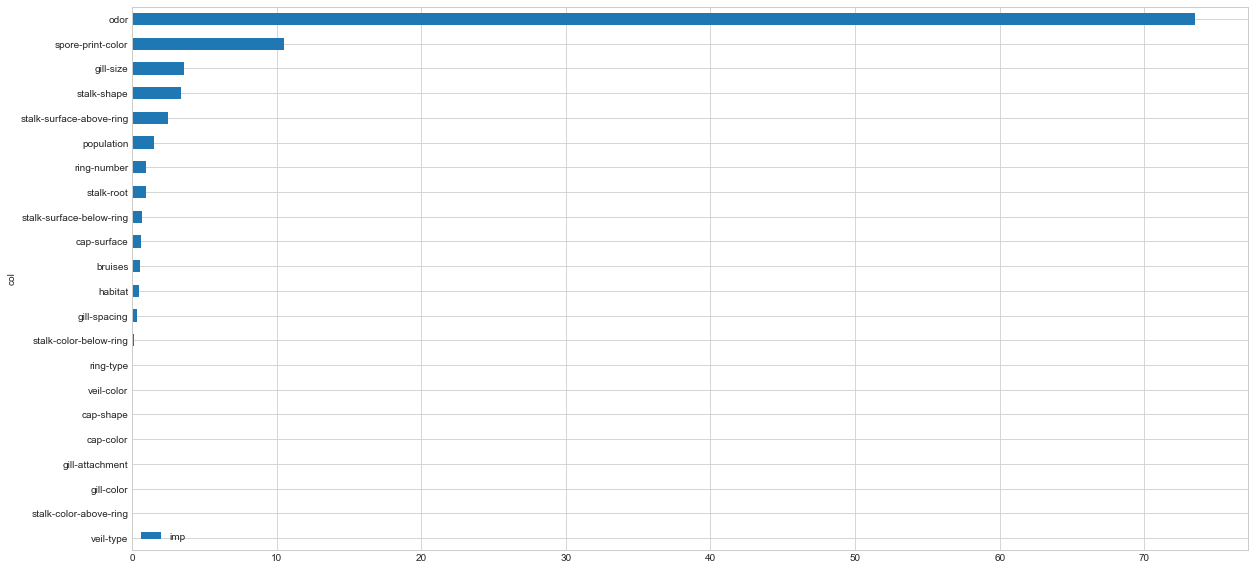

In [167]:
# Plot the feature importance scores
feature_importance(catboost_model, x_train)